In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("Social_Network_Ads.csv")

In [2]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    bool 
 1   Gender           400 non-null    bool 
 2   Age              400 non-null    bool 
 3   EstimatedSalary  400 non-null    bool 
 4   Purchased        400 non-null    bool 
dtypes: bool(5)
memory usage: 2.1 KB


In [3]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: ylabel='count'>

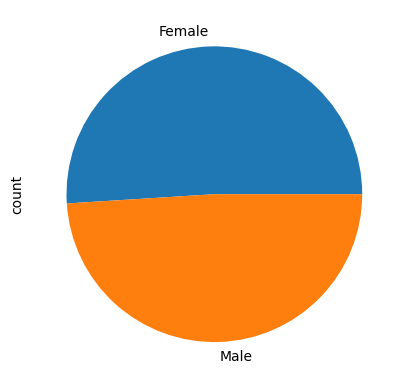

In [4]:
data['Gender'].value_counts().plot(kind='pie')

<Axes: xlabel='Gender'>

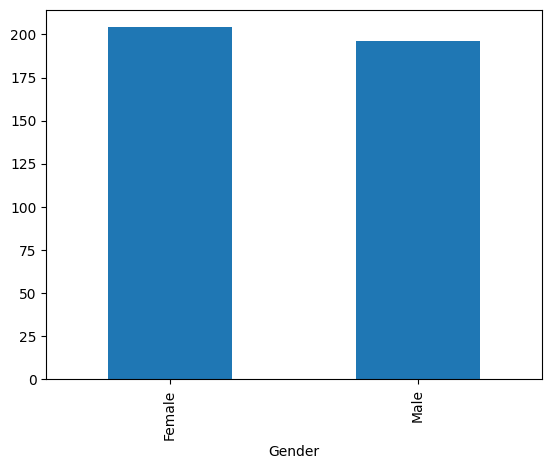

In [5]:
data['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

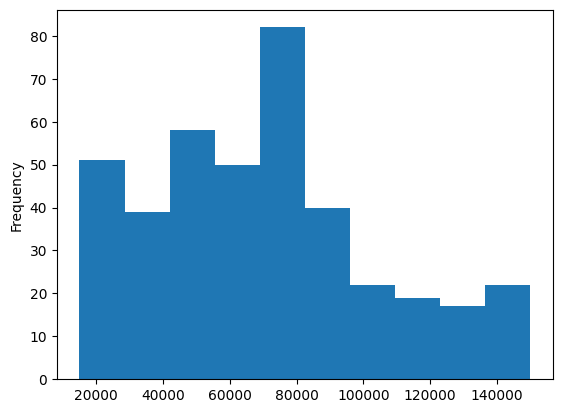

In [6]:
data["EstimatedSalary"].plot(kind='hist')

<Axes: ylabel='Frequency'>

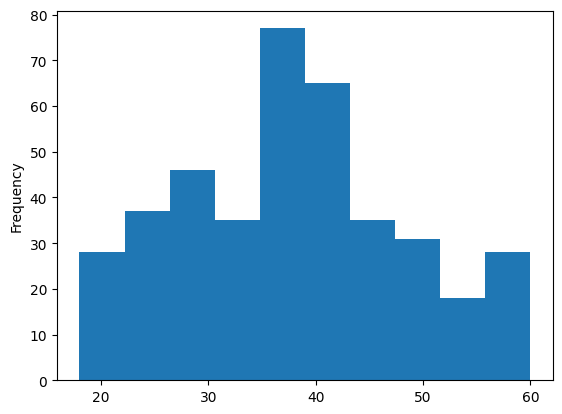

In [7]:
data["Age"].plot(kind='hist')

<Axes: >

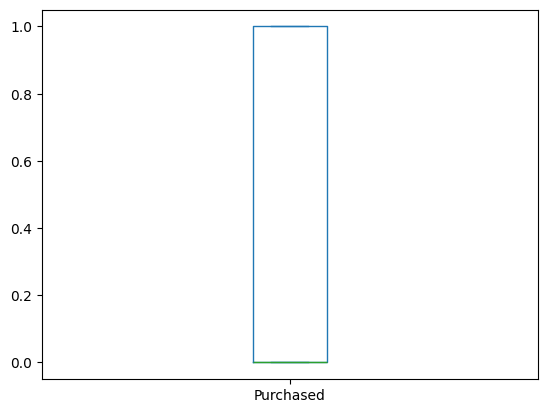

In [8]:
data["Purchased"].plot(kind='box')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

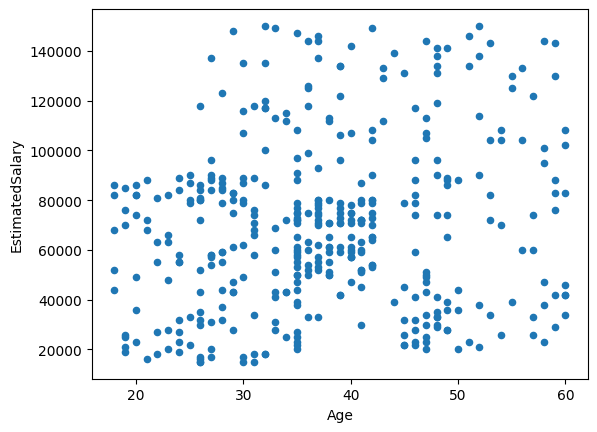

In [9]:
data.plot(kind='scatter', x='Age', y='EstimatedSalary')

In [10]:
x =data.drop(["Purchased"],axis=1)

In [11]:
Y=data["Purchased"]

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
gender=data["Gender"]
gender

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [14]:
# Encode the gender column as integers
le = LabelEncoder()
gender = le.fit_transform(gender)
gender

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [15]:
x = x.drop('Gender', axis=1)



In [16]:
# Concatenate the encoded gender column with the input data
x = np.concatenate((x, gender.reshape(-1, 1)), axis=1)
x

array([[1.5624510e+07, 1.9000000e+01, 1.9000000e+04, 1.0000000e+00],
       [1.5810944e+07, 3.5000000e+01, 2.0000000e+04, 1.0000000e+00],
       [1.5668575e+07, 2.6000000e+01, 4.3000000e+04, 0.0000000e+00],
       ...,
       [1.5654296e+07, 5.0000000e+01, 2.0000000e+04, 0.0000000e+00],
       [1.5755018e+07, 3.6000000e+01, 3.3000000e+04, 1.0000000e+00],
       [1.5594041e+07, 4.9000000e+01, 3.6000000e+04, 0.0000000e+00]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x, Y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# Instantiate the logistic regression model
lr_model = LogisticRegression()

In [21]:
# Fit the model to the training data
lr_model.fit(x_train, y_train)


LogisticRegression()

In [22]:
# Make predictions on the test set
y_pred = lr_model.predict(x_test)

In [23]:
# Compute classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

In [24]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

